In [9]:
import pandas as pd
import numpy as np


# 1. Data Exploration


In [10]:
df=pd.read_csv("dataset.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [12]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


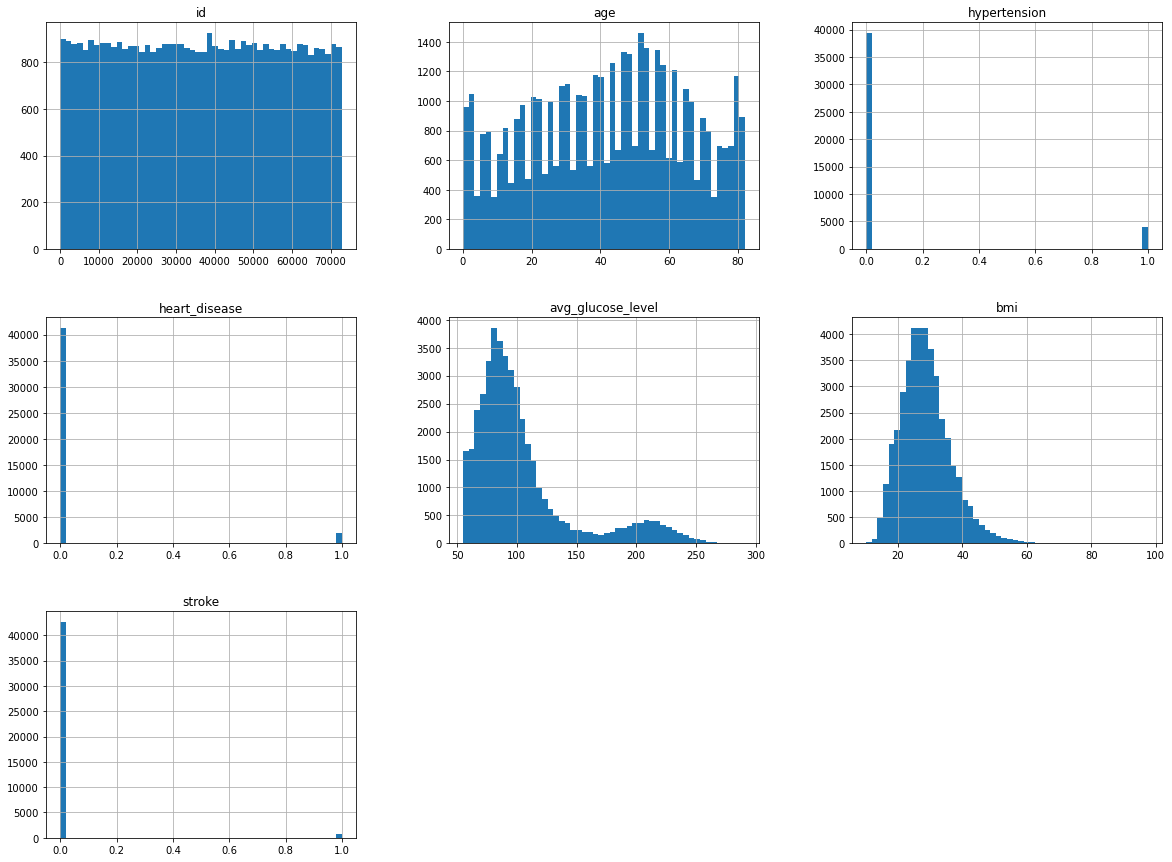

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

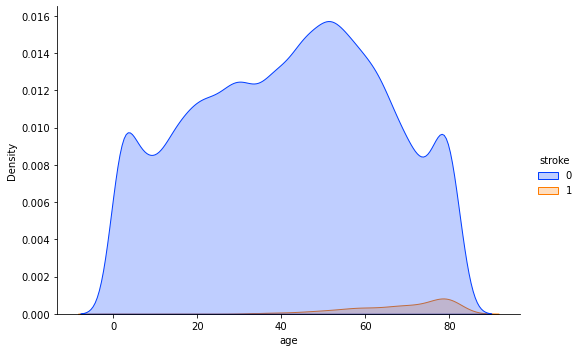

In [14]:
import seaborn as sns
sns.displot(data=df, x='age', hue='stroke', kind='kde', fill=True,
            aspect=1.5, palette=sns.color_palette('bright')[:2])
plt.show()

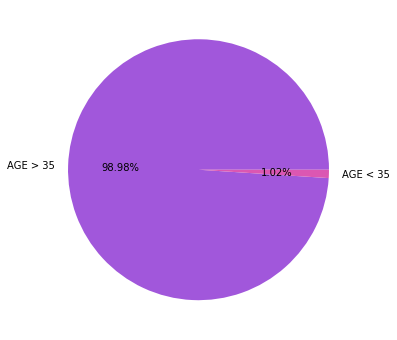

In [ ]:
plt.figure(figsize=(6, 6))
classx = ['AGE > 35','AGE < 35']
colors = sns.color_palette("hls", 8)[6:8]
countx = [len(df.loc[(df.age >= 35) & (df.stroke == 1)]),len(df.loc[(df.age < 35) & (df.stroke == 1)])]
plt.pie(countx, labels = classx,colors=colors,autopct='%1.2f%%')
plt.show()

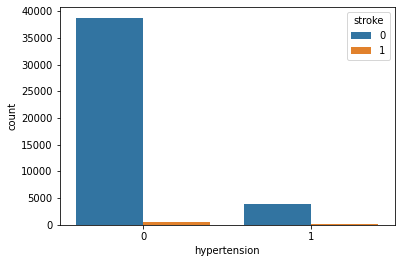

In [ ]:
sns.countplot(data=df,x='hypertension',hue='stroke')

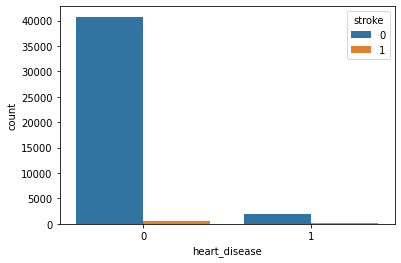

In [ ]:
sns.countplot(data=df,x='heart_disease',hue='stroke')

# Which factors will have the biggest impact?

In [ ]:
condition = (df.stroke == 1)

df.loc[condition, ['age', 'hypertension','heart_disease', 'avg_glucose_level', 'bmi', 'gender']]

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender
63,67.0,0,1,228.69,36.6,Male
81,61.0,0,0,202.21,NaN,Female
141,80.0,0,1,105.92,32.5,Male
257,49.0,0,0,171.23,34.4,Female
264,79.0,1,0,174.12,24.0,Female
...,...,...,...,...,...,...
43148,56.0,0,0,83.27,32.9,Female
43268,69.0,0,0,97.36,28.0,Male
43304,80.0,0,0,75.91,26.7,Female
43318,62.0,1,1,77.97,31.5,Male


* hypertension & stroke



In [ ]:
condition = (df.stroke == 1) | (df.hypertension == 1)
hypertension = df.loc[condition, ['hypertension', 'stroke']]
probability = len(hypertension) / len(df) * 100
print(probability)

10.700460829493087


* heart disease & stroke

In [ ]:
condition = (df.stroke == 1) | (df.heart_disease == 1)
heart_disease = df.loc[condition, ['heart_disease', 'stroke']]
probability = len(heart_disease) / len(df) * 100
print(probability)

6.147465437788018


* married & stroke

In [ ]:
condition = (df.stroke == 1) | (df.ever_married == 'Yes')
ever_married = df.loc[condition, ['ever_married', 'stroke']]
probability = len(ever_married) / len(df) * 100
print(probability)

64.55760368663594


* work type & stroke

In [ ]:
condition = (df.stroke == 1) | (df.work_type == 'Private')
work_type = df.loc[condition, ['work_type', 'stroke']]
probability = len(work_type) / len(df) * 100
print(probability)

58.00921658986176


In [ ]:
condition = (df.stroke == 1) | (df.work_type == 'Never_worked')
work_type = df.loc[condition, ['work_type', 'stroke']]
probability = len(work_type) / len(df) * 100
print(probability)

2.2119815668202767


In [ ]:
condition = (df.stroke == 1) | (df.work_type == 'children')
work_type = df.loc[condition, ['work_type', 'stroke']]
probability = len(work_type) / len(df) * 100
print(probability)

15.983870967741936


In [ ]:
condition = (df.stroke == 1) | (df.work_type == 'Govt_job')
work_type = df.loc[condition, ['work_type', 'stroke']]
probability = len(work_type) / len(df) * 100
print(probability)

14.133640552995391


In [ ]:
condition = (df.stroke == 1) | (df.work_type == 'Self-employed')
work_type = df.loc[condition, ['work_type', 'stroke']]
probability = len(work_type) / len(df) * 100
print(probability)

16.877880184331797


* residence type & stroke

In [ ]:
condition = (df.stroke == 1) | (df.Residence_type == 'Urban')
Residence_type = df.loc[condition, ['Residence_type', 'stroke']]
probability = len(Residence_type) / len(df) * 100
print(probability)

51.013824884792626


* average glucose level & stroke

In [ ]:
condition = (df.stroke == 1) | (df.avg_glucose_level > 126)
avg_glucose_level = df.loc[condition, ['avg_glucose_level', 'stroke']]
probability = len(avg_glucose_level) / len(df) * 100
print(probability)

18.882488479262673


* bmi & stroke

In [ ]:
condition = (df.stroke == 1) | (df.bmi > 25)
bmi = df.loc[condition, ['bmi', 'stroke']]
probability = len(bmi) / len(df) * 100
print(probability)

63.97926267281105


* smoking status & stroke

In [ ]:
condition = (df.stroke == 1) | (df.smoking_status == 'never smoked')
smoking_status = df.loc[condition, ['smoking_status', 'stroke']]
probability = len(smoking_status) / len(df) * 100
print(probability)

38.13824884792626


# 2. Data Preprocessing

**2-1. Handling Missing Values**

In [ ]:
#결측치 비율
df.isnull().sum() / len(df)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

There are missing values in bmi and smoking status.


---



**2-1-1. Treating missing value of bmi**

In [ ]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.012760,0.006571,0.009234,0.024634,0.018839,0.002976
age,0.012760,1.000000,0.272169,0.250188,0.237627,0.358897,0.156049
hypertension,0.006571,0.272169,1.000000,0.119777,0.160211,0.161225,0.075332
heart_disease,0.009234,0.250188,0.119777,1.000000,0.146938,0.057677,0.113763
avg_glucose_level,0.024634,0.237627,0.160211,0.146938,1.000000,0.191295,0.078917
bmi,0.018839,0.358897,0.161225,0.057677,0.191295,1.000000,0.020285
stroke,0.002976,0.156049,0.075332,0.113763,0.078917,0.020285,1.000000


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [ ]:
bins = [0, 10, 20, 30,40,50, 60,70,80,90]
labels = ['kids','10s', '20s', '30s', '40s', '50s','60s','70s','80s']
df["age_range"]=pd.cut(df["age"], bins,labels=labels)
df["age_range"]

0        kids
1         50s
2        kids
3         60s
4         10s
         ... 
43395    kids
43396     50s
43397     80s
43398     30s
43399     80s
Name: age_range, Length: 43400, dtype: category
Categories (9, object): ['kids' < '10s' < '20s' < '30s' ... '50s' < '60s' < '70s' < '80s']

In [ ]:
bmi_mean= df["bmi"].groupby(df["age_range"]).mean()
bmi_mean

age_range
kids    18.866401
10s     24.993708
20s     28.712198
30s     30.677261
40s     31.186276
50s     31.464315
60s     31.149074
70s     29.079810
80s     27.566589
Name: bmi, dtype: float64

In [ ]:
#Handling missing value

for i in range (0,9):
    df.loc[(df["age_range"]== labels[i]) & (df["bmi"].isnull()), 'bmi'] = bmi_mean[i] 
    
df['bmi'].isnull().sum()

0

**2-1-2. Treating missing value of smoking status**

In [ ]:
df["smoking_status"].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64



*   Smoking distribution by age



In [ ]:
df["smoking_status"].groupby(df["age_range"]).value_counts()

age_range  smoking_status 
kids       never smoked         62
           formerly smoked      16
           smokes                1
10s        never smoked       1822
           formerly smoked     294
           smokes              252
20s        never smoked       2356
           smokes             1116
           formerly smoked     684
30s        never smoked       2466
           smokes             1103
           formerly smoked     804
40s        never smoked       2713
           smokes             1388
           formerly smoked    1087
50s        never smoked       2680
           formerly smoked    1478
           smokes             1307
60s        never smoked       1922
           formerly smoked    1495
           smokes              850
70s        never smoked       1680
           formerly smoked    1355
           smokes              474
80s        never smoked        352
           formerly smoked     280
           smokes               71
Name: smoking_status, dtype:

* Fill in the missing values ​​with never smoked because children and teenagers are often never smoked.

In [ ]:
 df.loc[((df["age_range"]== "아동") |(df["age_range"]== "10대" )) & (df["smoking_status"].isnull()), 'smoking_status'] = "never smoked"

 df.isnull().sum() / len(df)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   0.000000
smoking_status       30.626728
stroke                0.000000
age_range             0.000000
dtype: float64

In [ ]:
df["smoking_status"].groupby(df["heart_disease"]).value_counts()

heart_disease  smoking_status 
0              never smoked       15449
               formerly smoked     6846
               smokes              6135
1              formerly smoked      647
               never smoked         604
               smokes               427
Name: smoking_status, dtype: int64

* People with heart disease fill in the gaps because there are many people who have smoked in the past.

In [ ]:
df.loc[(df["heart_disease"]==1) & (df["smoking_status"].isnull()) , 'smoking_status'] = "formerly smoked"

df.groupby(["gender","age_range","smoking_status"]).count()

id     age  ...     bmi  stroke
gender age_range smoking_status                   ...                
Female kids      formerly smoked     8.0     8.0  ...     8.0     8.0
                 never smoked       35.0    35.0  ...    35.0    35.0
                 smokes              NaN     NaN  ...     NaN     NaN
       10s       formerly smoked   168.0   168.0  ...   168.0   168.0
                 never smoked     1051.0  1051.0  ...  1051.0  1051.0
...                                  ...     ...  ...     ...     ...
Other  70s       never smoked        NaN     NaN  ...     NaN     NaN
                 smokes              NaN     NaN  ...     NaN     NaN
       80s       formerly smoked     NaN     NaN  ...     NaN     NaN
                 never smoked        NaN     NaN  ...     NaN     NaN
                 smokes              NaN     NaN  ...     NaN     NaN

[81 rows x 10 columns]

* Among men, formerly smoked is the most in their 60s, 70s, and 80s. Therefore fill in missing values ​​with formerly smoked.

In [ ]:
df.loc[((df["age_range"]== "60s") |(df["age_range"]== "70s" )|(df["age_range"]== "80s" )) & (df["smoking_status"].isnull()), 'smoking_status'] = "formerly smoked"

df.isnull().sum() / len(df)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   0.000000
smoking_status       25.721198
stroke                0.000000
age_range             0.000000
dtype: float64

* The remaining 10% of missing values ​​are filled in as never smoked.

In [ ]:
df.loc[df["smoking_status"].isnull() , 'smoking_status'] = 'never smoked'

del df["age_range"]
del df["id"]

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


# 3. Spliting Training Data and Testing Data

In [ ]:
df["stroke"].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

* The difference in stroke occurrence according to age was large, so we tried to discard samples under 35 years of age.

In [ ]:
cf = df.copy()
young_index = df.loc[(df.age < 35)]
cf_train = cf.drop(index=young_index.index)

cf_train.shape

(26995, 11)

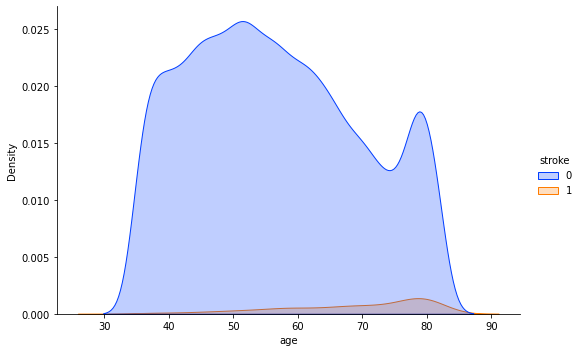

In [ ]:
sns.displot(data=cf_train, x='age', hue='stroke', kind='kde', fill=True,
            aspect=1.5, palette=sns.color_palette('bright')[:2])
plt.show()

* Since the ratio of stroke values ​​differs greatly, layered extraction is performed. The ratio of the test set was set to 0.3.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df["stroke"]):
    train = df.iloc[train_index]
    test_set= df.iloc[test_index]

In [ ]:
# 35 or less sample discarded data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(cf, cf["stroke"]):
    ctrain = cf.iloc[train_index]
    ctest_set= cf.iloc[test_index]

* To proceed with model evaluation for model selection, layered extraction is performed once more with validation and train set.

In [ ]:
for train_index, valid_index in split.split(train, train['stroke']):
    train_set = train.iloc[train_index]
    valid_set = train.iloc[valid_index]

In [ ]:
#orginal data

x_train= train_set.drop("stroke", axis=1)
y_train= train_set["stroke"].copy()
x_test= test_set.drop("stroke", axis=1)
y_test= test_set["stroke"].copy()
x_valid= valid_set.drop("stroke", axis=1)
y_valid= valid_set["stroke"].copy()

In [ ]:
# 35 or less sample discarded data

for train_index, valid_index in split.split(ctrain, ctrain['stroke']):
    ctrain_set = train.iloc[train_index]
    cvalid_set = train.iloc[valid_index]

cx_train= ctrain_set.drop("stroke", axis=1)
cy_train= ctrain_set["stroke"].copy()
cx_test= ctest_set.drop("stroke", axis=1)
cy_test= ctest_set["stroke"].copy()
cx_valid= cvalid_set.drop("stroke", axis=1)
cy_valid= cvalid_set["stroke"].copy()

# 4. Pipeline

* Separating categorical and numeric data

In [ ]:
num_attributes =["age","avg_glucose_level","bmi"]

x_train_num= x_train[num_attributes]
x_train_num

,age,avg_glucose_level,bmi
33588,16.0,136.29,16.9
34124,70.0,111.31,39.1
23872,37.0,74.10,31.2
15349,60.0,106.69,34.6
39264,38.0,78.37,21.9
...,...,...,...
29863,60.0,187.86,42.9
43214,46.0,73.32,31.6
4489,32.0,68.72,25.1
18245,64.0,123.87,31.6


In [ ]:
x_train_cat = x_train.drop(num_attributes , axis=1)
x_train_cat

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
33588,Male,0,0,No,Never_worked,Rural,never smoked
34124,Male,0,0,Yes,Self-employed,Rural,formerly smoked
23872,Female,0,0,Yes,Private,Rural,formerly smoked
15349,Male,0,0,Yes,Private,Rural,formerly smoked
39264,Male,0,0,Yes,Private,Rural,smokes
...,...,...,...,...,...,...,...
29863,Female,1,0,No,Private,Rural,never smoked
43214,Female,0,0,Yes,Govt_job,Urban,never smoked
4489,Female,0,0,No,Private,Rural,never smoked
18245,Female,0,0,Yes,Private,Urban,formerly smoked


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 
 ('std_scaler', StandardScaler()),
 ])
scaled_x_num = num_pipeline.fit_transform(x_train_num)

In [ ]:
#original data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_attribs =["age","avg_glucose_level","bmi"]
cat_attribs = ["gender","ever_married","work_type","Residence_type","smoking_status"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
x_train_prepared = full_pipeline.fit_transform(x_train)

In [ ]:
# 35 or less sample discarded data

cx_train_prepared = full_pipeline.fit_transform(cx_train)

* There was an asymmetric data processing program and we tried it.

In [ ]:
#original data

%%capture
%%bash
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_prepared, y_train)

In [ ]:
x_train_prepared.shape, x_train_smote.shape

((21266, 18), (41764, 18))

In [ ]:
#discarded data

cx_train_smote, cy_train_smote = smote.fit_resample(cx_train_prepared, cy_train)

* Numeric types are converted using standardscaler, and categorical types are converted using a one-hot encoder.

In [ ]:
pd.DataFrame(x_train_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.161750,0.744140,-1.540213,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.236627,0.161515,1.375936,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.229048,-0.706359,0.338208,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.792483,0.053759,0.784825,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.184633,-0.606767,-0.883422,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# 5. Model Selection

For evaluation of each model, ROC auc score and f1 score were used.

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
def show_model_results(model, x=x_train_prepared, y=y_train):
  model.fit(x, y)
  print(f"Train accuracy: {model.score(x, y)*100:2f}%")
  print(f"f1 score: {f1_score(y, model.predict(x))}")
  valid_x = full_pipeline.fit_transform(x_valid)
  print(f"Valid accuracy: {model.score(valid_x, y_valid)*100:2f}%")
  print(f"ROC AUC score: {roc_auc_score(y_valid, model.predict(valid_x))}")
  print(f"Confusion matrix: {confusion_matrix(y_valid, model.predict(valid_x))}")
  print(f"classification report: {classification_report(y_valid, model.predict(valid_x))}")

**5-1. MLP**

In [ ]:
import tensorflow as tf
from tensorflow import keras

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
mlp = keras.models.Sequential()
mlp.add(keras.layers.Dense(2, activation='relu'))
mlp.add(keras.layers.BatchNormalization())
mlp.add(keras.layers.Dense(5, activation='relu'))
mlp.add(keras.layers.Dense(1, activation='sigmoid'))

mlp.compile(loss='binary_crossentropy', optimizer='Adam',
            metrics=['accuracy', 'Precision', 'Recall'])

valid_x = full_pipeline.fit_transform(x_valid)
history = mlp.fit(x_train_prepared, y_train, epochs=15, batch_size=300, validation_data=(valid_x, y_valid))


print(f"ROC AUC score: {roc_auc_score(y_valid, mlp.predict(valid_x))}")

Epoch 1/15
71/71 [==============================] - 2s 9ms/step - loss: 0.4857 - accuracy: 0.9600 - precision: 0.0043 - recall: 0.0052 - val_loss: 0.4611 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
71/71 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2820 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
71/71 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1765 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
71/71 [==============================] - 0s 3ms/step - loss: 0.1579 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1246 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
71/71 [==============================] - 0s 3

In [ ]:
mlps = keras.models.Sequential()
mlps.add(keras.layers.Dense(15, activation='relu'))
mlps.add(keras.layers.BatchNormalization())
mlps.add(keras.layers.Dense(30, activation='relu'))
mlps.add(keras.layers.Dense(1, activation='sigmoid'))

mlps.compile(loss='binary_crossentropy', optimizer='Adam',
            metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
history = mlps.fit(x_train_smote, y_train_smote, epochs=15, batch_size=300, 
                  validation_data=(valid_x, y_valid))
print(f"ROC AUC score: {roc_auc_score(y_valid, mlps.predict(valid_x))}")

Epoch 1/15
140/140 [==============================] - 2s 6ms/step - loss: 0.5386 - accuracy: 0.7287 - precision: 0.7071 - recall: 0.7811 - val_loss: 0.5979 - val_accuracy: 0.6049 - val_precision: 0.0389 - val_recall: 0.8841
Epoch 2/15
140/140 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.7981 - precision: 0.7566 - recall: 0.8791 - val_loss: 0.4968 - val_accuracy: 0.7011 - val_precision: 0.0487 - val_recall: 0.8415
Epoch 3/15
140/140 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.8124 - precision: 0.7676 - recall: 0.8960 - val_loss: 0.4556 - val_accuracy: 0.7256 - val_precision: 0.0497 - val_recall: 0.7866
Epoch 4/15
140/140 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8171 - precision: 0.7721 - recall: 0.8999 - val_loss: 0.4585 - val_accuracy: 0.7278 - val_precision: 0.0494 - val_recall: 0.7744
Epoch 5/15
140/140 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.8213 - pr

In [ ]:
mlp_smote = keras.models.Sequential()
mlp_smote.add(keras.layers.Dense(100, activation='relu'))
mlp_smote.add(keras.layers.BatchNormalization())
mlp_smote.add(keras.layers.Dense(200, activation='relu'))
mlp_smote.add(keras.layers.Dense(100, activation='relu'))
mlp_smote.add(keras.layers.Dense(1, activation='sigmoid'))

mlp_smote.compile(loss='binary_crossentropy', optimizer='Adam',
            metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
history = mlp_smote.fit(x_train_smote, y_train_smote, epochs=20, batch_size=300, 
                  validation_data=(valid_x, y_valid))
print(f"ROC AUC score: {roc_auc_score(y_valid, mlp_smote.predict(valid_x))}")

Epoch 1/20
140/140 [==============================] - 3s 10ms/step - loss: 0.3874 - accuracy: 0.8269 - precision: 0.7841 - recall: 0.9022 - val_loss: 0.3655 - val_accuracy: 0.8145 - val_precision: 0.0640 - val_recall: 0.6829
Epoch 2/20
140/140 [==============================] - 1s 8ms/step - loss: 0.3044 - accuracy: 0.8715 - precision: 0.8279 - recall: 0.9380 - val_loss: 0.3295 - val_accuracy: 0.8142 - val_precision: 0.0583 - val_recall: 0.6159
Epoch 3/20
140/140 [==============================] - 1s 8ms/step - loss: 0.2600 - accuracy: 0.8947 - precision: 0.8553 - recall: 0.9501 - val_loss: 0.3161 - val_accuracy: 0.8316 - val_precision: 0.0557 - val_recall: 0.5244
Epoch 4/20
140/140 [==============================] - 1s 9ms/step - loss: 0.2332 - accuracy: 0.9098 - precision: 0.8725 - recall: 0.9599 - val_loss: 0.3010 - val_accuracy: 0.8567 - val_precision: 0.0608 - val_recall: 0.4817
Epoch 5/20
140/140 [==============================] - 1s 8ms/step - loss: 0.2087 - accuracy: 0.9216 - p

In [ ]:
class_weight = { 1: 0.96, 0: 0.04}

In [ ]:
history = mlp.fit(x_train_prepared, y_train, epochs=15, batch_size=300, 
                  validation_data=(valid_x, y_valid), class_weight=class_weight)

Epoch 1/15
71/71 [==============================] - 1s 5ms/step - loss: 0.0491 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1140 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
71/71 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1334 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
71/71 [==============================] - 0s 4ms/step - loss: 0.0360 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1483 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
71/71 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1611 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
71/71 [==============================

In [ ]:
print(f"ROC AUC score: {roc_auc_score(y_valid, mlp.predict(valid_x))}")

ROC AUC score: 0.819197097697234


In [ ]:
#discarded data

cvalid_x = full_pipeline.fit_transform(cx_valid)
history = mlp.fit(cx_train_prepared, cy_train, epochs=15, batch_size=300, validation_data=(cvalid_x, cy_valid))


print(f"ROC AUC score: {roc_auc_score(cy_valid, mlp.predict(cvalid_x))}")

Epoch 1/15
71/71 [==============================] - 0s 4ms/step - loss: 0.1238 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0842 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
71/71 [==============================] - 0s 3ms/step - loss: 0.0792 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0791 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
71/71 [==============================] - 0s 4ms/step - loss: 0.0780 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0764 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
71/71 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0754 - val_accuracy: 0.9820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
71/71 [==============================

In [ ]:
history = mlp_smote.fit(cx_train_smote, cy_train_smote, epochs=15, batch_size=300, 
                  validation_data=(cvalid_x, cy_valid))
print(f"ROC AUC score: {roc_auc_score(cy_valid, mlp_smote.predict(cvalid_x))}")

Epoch 1/15
140/140 [==============================] - 1s 8ms/step - loss: 0.1316 - accuracy: 0.9535 - precision: 0.9316 - recall: 0.9788 - val_loss: 0.3107 - val_accuracy: 0.9051 - val_precision: 0.0591 - val_recall: 0.2866
Epoch 2/15
140/140 [==============================] - 1s 8ms/step - loss: 0.1333 - accuracy: 0.9528 - precision: 0.9302 - recall: 0.9791 - val_loss: 0.3136 - val_accuracy: 0.9036 - val_precision: 0.0503 - val_recall: 0.2439
Epoch 3/15
140/140 [==============================] - 1s 8ms/step - loss: 0.1293 - accuracy: 0.9534 - precision: 0.9307 - recall: 0.9797 - val_loss: 0.2973 - val_accuracy: 0.9113 - val_precision: 0.0503 - val_recall: 0.2195
Epoch 4/15
140/140 [==============================] - 1s 8ms/step - loss: 0.1248 - accuracy: 0.9569 - precision: 0.9357 - recall: 0.9814 - val_loss: 0.2965 - val_accuracy: 0.9152 - val_precision: 0.0555 - val_recall: 0.2317
Epoch 5/15
140/140 [==============================] - 1s 8ms/step - loss: 0.1240 - accuracy: 0.9563 - pr

**5-2. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#original data
log_reg = LogisticRegression()
show_model_results(log_reg)

Train accuracy: 98.194301%
f1 score: 0.0
Valid accuracy: 98.200571%
ROC AUC score: 0.5
Confusion matrix: [[8950    0]
 [ 164    0]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9114
   macro avg       0.49      0.50      0.50      9114
weighted avg       0.96      0.98      0.97      9114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
class_weight = {1: 0.93, 0: 0.07}
log_reg_weighted = LogisticRegression(class_weight=class_weight)
show_model_results(log_reg_weighted)

Train accuracy: 92.255243%
f1 score: 0.13270142180094785
Valid accuracy: 92.703533%
ROC AUC score: 0.6426073034473362
Confusion matrix: [[8392  558]
 [ 107   57]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.94      0.96      8950
           1       0.09      0.35      0.15       164

    accuracy                           0.93      9114
   macro avg       0.54      0.64      0.55      9114
weighted avg       0.97      0.93      0.95      9114



In [ ]:
show_model_results(log_reg, x_train_smote, y_train_smote)

Train accuracy: 78.440762%
f1 score: 0.7950095619706767
Valid accuracy: 73.886329%
ROC AUC score: 0.7682729254666849
Confusion matrix: [[6603 2347]
 [  33  131]]
classification report:               precision    recall  f1-score   support

           0       1.00      0.74      0.85      8950
           1       0.05      0.80      0.10       164

    accuracy                           0.74      9114
   macro avg       0.52      0.77      0.47      9114
weighted avg       0.98      0.74      0.83      9114



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#discarded data

show_model_results(log_reg, cx_train_prepared, cy_train)

Train accuracy: 98.194301%
f1 score: 0.0
Valid accuracy: 98.200571%
ROC AUC score: 0.5
Confusion matrix: [[8950    0]
 [ 164    0]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9114
   macro avg       0.49      0.50      0.50      9114
weighted avg       0.96      0.98      0.97      9114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
show_model_results(log_reg_weighted, cx_train_prepared, cy_train)

Train accuracy: 92.255243%
f1 score: 0.13270142180094785
Valid accuracy: 92.703533%
ROC AUC score: 0.6426073034473362
Confusion matrix: [[8392  558]
 [ 107   57]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.94      0.96      8950
           1       0.09      0.35      0.15       164

    accuracy                           0.93      9114
   macro avg       0.54      0.64      0.55      9114
weighted avg       0.97      0.93      0.95      9114



In [ ]:
show_model_results(log_reg, cx_train_smote, cy_train_smote)

Train accuracy: 78.440762%
f1 score: 0.7950095619706767
Valid accuracy: 73.886329%
ROC AUC score: 0.7682729254666849
Confusion matrix: [[6603 2347]
 [  33  131]]
classification report:               precision    recall  f1-score   support

           0       1.00      0.74      0.85      8950
           1       0.05      0.80      0.10       164

    accuracy                           0.74      9114
   macro avg       0.52      0.77      0.47      9114
weighted avg       0.98      0.74      0.83      9114



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**5-3. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
show_model_results(rfc)

Train accuracy: 99.990595%
f1 score: 0.9973890339425587
Valid accuracy: 98.178626%
ROC AUC score: 0.49988826815642456
Confusion matrix: [[8948    2]
 [ 164    0]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9114
   macro avg       0.49      0.50      0.50      9114
weighted avg       0.96      0.98      0.97      9114



In [ ]:
rfc_weighted = RandomForestClassifier(class_weight=class_weight)
show_model_results(rfc_weighted)

Train accuracy: 99.995298%
f1 score: 0.998696219035202
Valid accuracy: 98.167654%
ROC AUC score: 0.4998324022346369
Confusion matrix: [[8947    3]
 [ 164    0]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9114
   macro avg       0.49      0.50      0.50      9114
weighted avg       0.96      0.98      0.97      9114



In [ ]:
show_model_results(rfc, x_train_smote, y_train_smote)

Train accuracy: 100.000000%
f1 score: 1.0
Valid accuracy: 92.604784%
ROC AUC score: 0.5822462188309033
Confusion matrix: [[8403  547]
 [ 127   37]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.94      0.96      8950
           1       0.06      0.23      0.10       164

    accuracy                           0.93      9114
   macro avg       0.52      0.58      0.53      9114
weighted avg       0.97      0.93      0.95      9114



In [ ]:
#discarded data

show_model_results(rfc, cx_train_prepared, cy_train)

Train accuracy: 99.985893%
f1 score: 0.996078431372549
Valid accuracy: 98.178626%
ROC AUC score: 0.49988826815642456
Confusion matrix: [[8948    2]
 [ 164    0]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9114
   macro avg       0.49      0.50      0.50      9114
weighted avg       0.96      0.98      0.97      9114



In [ ]:
show_model_results(rfc_weighted, cx_train_prepared, cy_train)

Train accuracy: 99.995298%
f1 score: 0.998696219035202
Valid accuracy: 98.189598%
ROC AUC score: 0.5029370486442295
Confusion matrix: [[8948    2]
 [ 163    1]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.33      0.01      0.01       164

    accuracy                           0.98      9114
   macro avg       0.66      0.50      0.50      9114
weighted avg       0.97      0.98      0.97      9114



In [ ]:
show_model_results(rfc, cx_train_smote, cy_train_smote)

Train accuracy: 100.000000%
f1 score: 1.0
Valid accuracy: 92.593812%
ROC AUC score: 0.5732116092110642
Confusion matrix: [[8405  545]
 [ 130   34]]
classification report:               precision    recall  f1-score   support

           0       0.98      0.94      0.96      8950
           1       0.06      0.21      0.09       164

    accuracy                           0.93      9114
   macro avg       0.52      0.57      0.53      9114
weighted avg       0.97      0.93      0.95      9114



**5-4. XGB Classifier**

In [ ]:
import xgboost as xgb

xgbc = xgb.XGBClassifier()
show_model_results(xgbc)

Train accuracy: 98.194301%
f1 score: 0.0
Valid accuracy: 98.200571%
ROC AUC score: 0.5
Confusion matrix: [[8950    0]
 [ 164    0]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9114
   macro avg       0.49      0.50      0.50      9114
weighted avg       0.96      0.98      0.97      9114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
xgbc_weighted = xgb.XGBClassifier(class_weight=class_weight)
show_model_results(xgbc_weighted)

Train accuracy: 98.194301%
f1 score: 0.0
Valid accuracy: 98.200571%
ROC AUC score: 0.5
Confusion matrix: [[8950    0]
 [ 164    0]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9114
   macro avg       0.49      0.50      0.50      9114
weighted avg       0.96      0.98      0.97      9114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
show_model_results(xgbc, x_train_smote, y_train_smote)

Train accuracy: 86.835552%
f1 score: 0.8757457964201772
Valid accuracy: 74.709239%
ROC AUC score: 0.7455266385066085
Confusion matrix: [[6687 2263]
 [  42  122]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.75      0.85      8950
           1       0.05      0.74      0.10       164

    accuracy                           0.75      9114
   macro avg       0.52      0.75      0.47      9114
weighted avg       0.98      0.75      0.84      9114



In [ ]:
#discarded data

show_model_results(xgbc, cx_train_prepared, cy_train)

Train accuracy: 98.194301%
f1 score: 0.0
Valid accuracy: 98.200571%
ROC AUC score: 0.5
Confusion matrix: [[8950    0]
 [ 164    0]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9114
   macro avg       0.49      0.50      0.50      9114
weighted avg       0.96      0.98      0.97      9114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
show_model_results(xgbc_weighted, cx_train_prepared, cy_train)

Train accuracy: 98.194301%
f1 score: 0.0
Valid accuracy: 98.200571%
ROC AUC score: 0.5
Confusion matrix: [[8950    0]
 [ 164    0]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9114
   macro avg       0.49      0.50      0.50      9114
weighted avg       0.96      0.98      0.97      9114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
show_model_results(xgbc_weighted, cx_train_smote, cy_train_smote)

Train accuracy: 86.835552%
f1 score: 0.8757457964201772
Valid accuracy: 74.709239%
ROC AUC score: 0.7455266385066085
Confusion matrix: [[6687 2263]
 [  42  122]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.75      0.85      8950
           1       0.05      0.74      0.10       164

    accuracy                           0.75      9114
   macro avg       0.52      0.75      0.47      9114
weighted avg       0.98      0.75      0.84      9114



**5-5. Linear SVC**

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
show_model_results(svc)

Train accuracy: 98.194301%
f1 score: 0.0
Valid accuracy: 98.200571%
ROC AUC score: 0.5
Confusion matrix: [[8950    0]
 [ 164    0]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9114
   macro avg       0.49      0.50      0.50      9114
weighted avg       0.96      0.98      0.97      9114



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [ ]:
svc_weighted = LinearSVC(class_weight=class_weight)
show_model_results(svc_weighted)

Train accuracy: 94.150287%
f1 score: 0.1408839779005525
Valid accuracy: 94.568795%
ROC AUC score: 0.6161895353590408
Confusion matrix: [[8574  376]
 [ 119   45]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.96      0.97      8950
           1       0.11      0.27      0.15       164

    accuracy                           0.95      9114
   macro avg       0.55      0.62      0.56      9114
weighted avg       0.97      0.95      0.96      9114



In [ ]:
show_model_results(xgbc, x_train_smote, y_train_smote)

Train accuracy: 86.835552%
f1 score: 0.8757457964201772
Valid accuracy: 74.709239%
ROC AUC score: 0.7455266385066085
Confusion matrix: [[6687 2263]
 [  42  122]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.75      0.85      8950
           1       0.05      0.74      0.10       164

    accuracy                           0.75      9114
   macro avg       0.52      0.75      0.47      9114
weighted avg       0.98      0.75      0.84      9114



In [ ]:
recall = 6687 / (6687+2263)
recall

0.7471508379888269

In [ ]:
#discarded data

show_model_results(svc, cx_train_prepared, cy_train)

Train accuracy: 98.194301%
f1 score: 0.0
Valid accuracy: 98.200571%
ROC AUC score: 0.5
Confusion matrix: [[8950    0]
 [ 164    0]]
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8950
           1       0.00      0.00      0.00       164

    accuracy                           0.98      9114
   macro avg       0.49      0.50      0.50      9114
weighted avg       0.96      0.98      0.97      9114



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [ ]:
show_model_results(svc_weighted, cx_train_prepared, cy_train)

Train accuracy: 94.150287%
f1 score: 0.1408839779005525
Valid accuracy: 94.568795%
ROC AUC score: 0.6161895353590408
Confusion matrix: [[8574  376]
 [ 119   45]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.96      0.97      8950
           1       0.11      0.27      0.15       164

    accuracy                           0.95      9114
   macro avg       0.55      0.62      0.56      9114
weighted avg       0.97      0.95      0.96      9114



In [ ]:
show_model_results(svc, x_train_smote, y_train_smote)

Train accuracy: 78.637104%
f1 score: 0.7986368150221179
Valid accuracy: 73.282862%
ROC AUC score: 0.7711861289003952
Confusion matrix: [[6546 2404]
 [  31  133]]
classification report:               precision    recall  f1-score   support

           0       1.00      0.73      0.84      8950
           1       0.05      0.81      0.10       164

    accuracy                           0.73      9114
   macro avg       0.52      0.77      0.47      9114
weighted avg       0.98      0.73      0.83      9114



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# 6. Model Tuning

In [ ]:
def show_smote_model_results(model, x=x_train_smote, y=y_train_smote):
  model.fit(x, y)
  print(f"Train accuracy: {model.score(x, y)*100:2f}%")
  print(f"f1 score: {f1_score(y, model.predict(x), average='macro')}")
  valid = full_pipeline.fit_transform(x_valid)
  valid_x, y_valids = smote.fit_resample(valid, y_valid)
  print(f"Valid accuracy: {model.score(valid_x, y_valids)*100:2f}%")
  print(f"ROC AUC score: {roc_auc_score(y_valids, model.predict(valid_x))}")
  print(f"Confusion matrix: {confusion_matrix(y_valids, model.predict(valid_x))}")
  print(f"classification report: {classification_report(y_valids, model.predict(valid_x))}")

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[1,3,5,7], 'min_child_weight':[1,3], 
          'colsample_bytree':[0.1,0.5,0.75]}

grid = GridSearchCV(xgb_clf, param_grid=params, cv=5)

valid = full_pipeline.fit_transform(x_valid)
x_valid_smote, y_valid_smote = smote.fit_resample(valid, y_valid)

grid.fit(x_train_smote, y_train_smote, early_stopping_rounds=100, 
         eval_metric='auc', eval_set=[(x_valid_smote, y_valid_smote)])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[49]	validation_0-auc:0.924293
[50]	validation_0-auc:0.924032
[51]	validation_0-auc:0.924678
[52]	validation_0-auc:0.92461
[53]	validation_0-auc:0.924247
[54]	validation_0-auc:0.92551
[55]	validation_0-auc:0.927016
[56]	validation_0-auc:0.927084
[57]	validation_0-auc:0.926862
[58]	validation_0-auc:0.927092
[59]	validation_0-auc:0.928791
[60]	validation_0-auc:0.928522
[61]	validation_0-auc:0.928021
[62]	validation_0-auc:0.928203
[63]	validation_0-auc:0.928638
[64]	validation_0-auc:0.928478
[65]	validation_0-auc:0.928254
[66]	validation_0-auc:0.929336
[67]	validation_0-auc:0.930808
[68]	validation_0-auc:0.932182
[69]	validation_0-auc:0.93215
[70]	validation_0-auc:0.931757
[71]	validation_0-auc:0.931719
[72]	validation_0-auc:0.931678
[73]	validation_0-auc:0.931388
[74]	validation_0-auc:0.931103
[75]	validation_0-auc:0.93097
[76]	validation_0-auc:0.930557
[77]	validation_0-auc:0.930904
[78]	validation_0-auc:0.930807
[79]	validation_0-auc:0.931669
[80]	va

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.1, 0.5, 0.75],
                         'max_depth': [1, 3, 5, 7],
                         'min_child_weight': [1, 3]})

In [ ]:
model = grid.best_estimator_
show_smote_model_results(model)

Train accuracy: 97.742075%
f1 score: 0.9774205969299243
Valid accuracy: 80.843575%
ROC AUC score: 0.8084357541899442
Confusion matrix: [[5957 2993]
 [ 436 8514]]
classification report:               precision    recall  f1-score   support

           0       0.93      0.67      0.78      8950
           1       0.74      0.95      0.83      8950

    accuracy                           0.81     17900
   macro avg       0.84      0.81      0.80     17900
weighted avg       0.84      0.81      0.80     17900



In [ ]:
cgrid = GridSearchCV(xgb_clf, param_grid=params, cv=5)
cgrid.fit(cx_train_smote, cy_train_smote, early_stopping_rounds=100, 
         eval_metric='error', eval_set=[(x_valid_smote, y_valid_smote)])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[49]	validation_0-error:0.182291
[50]	validation_0-error:0.180782
[51]	validation_0-error:0.17933
[52]	validation_0-error:0.178827
[53]	validation_0-error:0.180726
[54]	validation_0-error:0.181006
[55]	validation_0-error:0.180279
[56]	validation_0-error:0.183184
[57]	validation_0-error:0.185028
[58]	validation_0-error:0.184358
[59]	validation_0-error:0.183073
[60]	validation_0-error:0.181788
[61]	validation_0-error:0.182905
[62]	validation_0-error:0.183743
[63]	validation_0-error:0.183184
[64]	validation_0-error:0.183464
[65]	validation_0-error:0.185922
[66]	validation_0-error:0.185922
[67]	validation_0-error:0.18514
[68]	validation_0-error:0.183855
[69]	validation_0-error:0.183743
[70]	validation_0-error:0.184637
[71]	validation_0-error:0.184302
[72]	validation_0-error:0.186704
[73]	validation_0-error:0.186425
[74]	validation_0-error:0.186034
[75]	validation_0-error:0.186201
[76]	validation_0-error:0.185754
[77]	validation_0-error:0.185084
[78]	vali

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.1, 0.5, 0.75],
                         'max_depth': [1, 3, 5, 7],
                         'min_child_weight': [1, 3]})

In [ ]:
cmodel = cgrid.best_estimator_
show_smote_model_results(cmodel)

Train accuracy: 97.840245%
f1 score: 0.9784024500893789
Valid accuracy: 80.804469%
ROC AUC score: 0.8080446927374302
Confusion matrix: [[5890 3060]
 [ 376 8574]]
classification report:               precision    recall  f1-score   support

           0       0.94      0.66      0.77      8950
           1       0.74      0.96      0.83      8950

    accuracy                           0.81     17900
   macro avg       0.84      0.81      0.80     17900
weighted avg       0.84      0.81      0.80     17900



In [ ]:
grid1 = GridSearchCV(xgb_clf, param_grid=params, cv=5)
grid1.fit(cx_train_smote, cy_train_smote, early_stopping_rounds=100, 
         eval_metric='error', eval_set=[(x_valid_smote, y_valid_smote)])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[49]	validation_0-error:0.182291
[50]	validation_0-error:0.180782
[51]	validation_0-error:0.17933
[52]	validation_0-error:0.178827
[53]	validation_0-error:0.180726
[54]	validation_0-error:0.181006
[55]	validation_0-error:0.180279
[56]	validation_0-error:0.183184
[57]	validation_0-error:0.185028
[58]	validation_0-error:0.184358
[59]	validation_0-error:0.183073
[60]	validation_0-error:0.181788
[61]	validation_0-error:0.182905
[62]	validation_0-error:0.183743
[63]	validation_0-error:0.183184
[64]	validation_0-error:0.183464
[65]	validation_0-error:0.185922
[66]	validation_0-error:0.185922
[67]	validation_0-error:0.18514
[68]	validation_0-error:0.183855
[69]	validation_0-error:0.183743
[70]	validation_0-error:0.184637
[71]	validation_0-error:0.184302
[72]	validation_0-error:0.186704
[73]	validation_0-error:0.186425
[74]	validation_0-error:0.186034
[75]	validation_0-error:0.186201
[76]	validation_0-error:0.185754
[77]	validation_0-error:0.185084
[78]	vali

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.1, 0.5, 0.75],
                         'max_depth': [1, 3, 5, 7],
                         'min_child_weight': [1, 3]})

In [ ]:
model1 = grid1.best_estimator_
show_smote_model_results(model1)

Train accuracy: 97.840245%
f1 score: 0.9784024500893789
Valid accuracy: 80.804469%
ROC AUC score: 0.8080446927374302
Confusion matrix: [[5890 3060]
 [ 376 8574]]
classification report:               precision    recall  f1-score   support

           0       0.94      0.66      0.77      8950
           1       0.74      0.96      0.83      8950

    accuracy                           0.81     17900
   macro avg       0.84      0.81      0.80     17900
weighted avg       0.84      0.81      0.80     17900



In [ ]:
score = grid.cv_results_
score1 = grid1.cv_results_

score, score1

({'mean_fit_time': array([1.71949611, 1.7427402 , 2.00004144, 2.02860694, 2.14263778,
         2.16960249, 2.27871652, 2.29345217, 2.04471669, 2.06780849,
         2.91765571, 2.88405704, 3.83623948, 3.81066208, 4.79411187,
         4.77302022, 2.21876421, 2.18163204, 3.24486394, 3.22901831,
         4.34701152, 4.35242219, 5.51852403, 5.48629026]),
  'mean_score_time': array([0.01700215, 0.01652002, 0.02615738, 0.02747493, 0.03186483,
         0.03439832, 0.03872228, 0.03899384, 0.01813221, 0.02018728,
         0.0337471 , 0.03153505, 0.05133276, 0.05187068, 0.06759539,
         0.06892829, 0.01870918, 0.01812367, 0.0306706 , 0.03219385,
         0.04557362, 0.05188484, 0.06595554, 0.06605496]),
  'mean_test_score': array([0.78699349, 0.78699349, 0.84211287, 0.84211287, 0.87795715,
         0.87917826, 0.90003366, 0.9015421 , 0.79704999, 0.79704999,
         0.86725412, 0.86696668, 0.92503121, 0.92519882, 0.95520056,
         0.95409918, 0.79757679, 0.79757679, 0.86608078, 0.86667944,

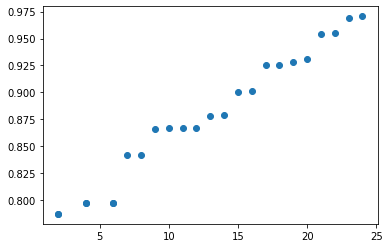

In [ ]:
plt.scatter((25-score['rank_test_score']),score['mean_test_score'])
plt.show()

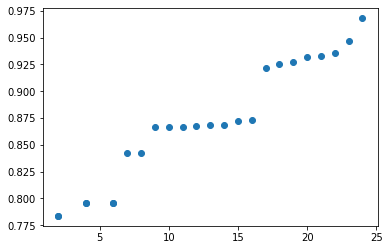

In [ ]:
plt.scatter((25-score1['rank_test_score']),score1['mean_test_score'])
plt.show()

# 7. Test 

In [ ]:
test = full_pipeline.fit_transform(x_test)
x_test_smote, y_test_smote = smote.fit_resample(test, y_test)
test_result = model1.predict(x_test_smote)
print(f"f1 score: {f1_score(y_test_smote,test_result)}")
print(f"Test accuracy: {model.score(x_test_smote, y_test_smote)*100:2f}%")
print(f"ROC AUC score: {roc_auc_score(y_test_smote,test_result)}")
print(f"Confusion matrix: {confusion_matrix(y_test_smote, test_result)}")
print(f"classification report: {classification_report(y_test_smote, test_result)}")


f1 score: 0.8201078185626482
Test accuracy: 79.475948%
ROC AUC score: 0.7951114587407118
Confusion matrix: [[ 8389  4396]
 [  843 11942]]
classification report:               precision    recall  f1-score   support

           0       0.91      0.66      0.76     12785
           1       0.73      0.93      0.82     12785

    accuracy                           0.80     25570
   macro avg       0.82      0.80      0.79     25570
weighted avg       0.82      0.80      0.79     25570

